<a href="https://colab.research.google.com/github/id-shiv/project_notebooks/blob/master/proj002_anomaly_detection_multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anomaly Detection
Anomaly or an outlier is data point in a dataset that is distant from other data points

In [0]:
# Import libraries
import pandas as pd
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import seaborn as sb
# generate the charts in notebook
%matplotlib inline

In [44]:
data_set_path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vR4xPlauQieuG_9EOmOwT15kcXB6kDQpCjx4__hF4K5lPMFrVEbxEx-ruB_Q-aT9e6S1nd8-DNitVFx/pub?output=csv'
data = pd.read_csv(data_set_path)
print(data)

    person  age  height  weight
0  personA   22     4.8      48
1  personB   24     5.8      58
2  personC   26     5.2      59
3  personD   28     6.1      72
4  personE   29     8.4     102
5  personF   30     5.9      81
6  personG   31     5.8      79
7  personH   32     5.4      71
8  personI   31     5.7      84
9  personJ   33     5.1      68


In [52]:
# Seperate out the label
persons = data['person']
data_samples = data.loc[:, 'height': 'weight']
print(persons)
print(data_samples)

0    personA
1    personB
2    personC
3    personD
4    personE
5    personF
6    personG
7    personH
8    personI
9    personJ
Name: person, dtype: object
   height  weight
0     4.8      48
1     5.8      58
2     5.2      59
3     6.1      72
4     8.4     102
5     5.9      81
6     5.8      79
7     5.4      71
8     5.7      84
9     5.1      68


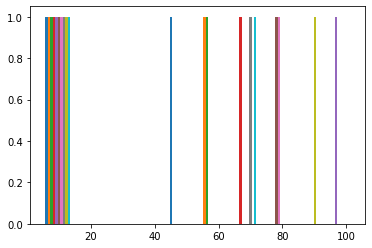

In [53]:
# histogram plot
plt.hist(data_samples)
plt.show()

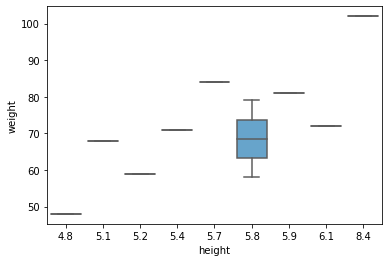

In [60]:
# box plot
sb.boxplot(x='height', y='weight', data=data_samples, palette='hls')

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


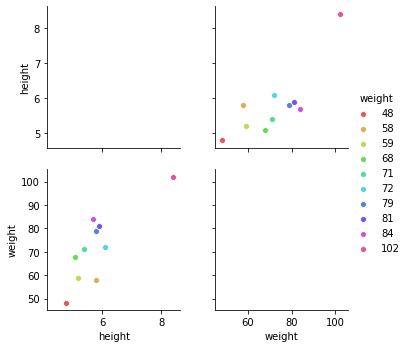

In [62]:
# Pair plot
sb.pairplot(data_samples, hue='weight', palette='hls')

Detect Multivariate outliers using one-class Support Vector Machines

In [68]:
model = OneClassSVM(kernel='linear', nu=0.95)
model.fit(data_samples)
print(model.predict(data_samples))
print(data_samples[model.predict(data_samples) == 1])

[-1 -1 -1 -1  1 -1 -1 -1 -1 -1]
   height  weight
4     8.4     102
